## РАБОТА С ТЕКСТОВЫМИ ДАННЫМИ

In [50]:
!python -m spacy.en.download

/bin/bash: python: command not found


In [20]:
import sklearn
import os
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from sklearn.datasets import load_files

folder = os.path.join(os.path.dirname("__file__"))
file = os.path.join(folder, 'aclImdb/train')
reviews_train = load_files(file)
# load_files возвращает коллекцию, содержащую обучающие 
# тесты и обучающие метки
text_train, y_train = reviews_train.data, \
    reviews_train.target
print("тип text_train: {}".format(type(text_train)))
print("длина text_train: {}".format(len(text_train)))
print("text_train[1]:\n{}".format(text_train[1]))

тип text_train: <class 'list'>
длина text_train: 75000
text_train[1]:
b"Amount of disappointment I am getting these days seeing movies like Partner, Jhoom Barabar and now, Heyy Babyy is gonna end my habit of seeing first day shows.<br /><br />The movie is an utter disappointment because it had the potential to become a laugh riot only if the d\xc3\xa9butant director, Sajid Khan hadn't tried too many things. Only saving grace in the movie were the last thirty minutes, which were seriously funny elsewhere the movie fails miserably. First half was desperately been tried to look funny but wasn't. Next 45 minutes were emotional and looked totally artificial and illogical.<br /><br />OK, when you are out for a movie like this you don't expect much logic but all the flaws tend to appear when you don't enjoy the movie and thats the case with Heyy Babyy. Acting is good but thats not enough to keep one interested.<br /><br />For the positives, you can take hot actresses, last 30 minutes, some co

In [22]:
text_train = [doc.replace(b'<br />', b' ') for doc in \
             text_train]
text_train[1]

b"Amount of disappointment I am getting these days seeing movies like Partner, Jhoom Barabar and now, Heyy Babyy is gonna end my habit of seeing first day shows.  The movie is an utter disappointment because it had the potential to become a laugh riot only if the d\xc3\xa9butant director, Sajid Khan hadn't tried too many things. Only saving grace in the movie were the last thirty minutes, which were seriously funny elsewhere the movie fails miserably. First half was desperately been tried to look funny but wasn't. Next 45 minutes were emotional and looked totally artificial and illogical.  OK, when you are out for a movie like this you don't expect much logic but all the flaws tend to appear when you don't enjoy the movie and thats the case with Heyy Babyy. Acting is good but thats not enough to keep one interested.  For the positives, you can take hot actresses, last 30 minutes, some comic scenes, good acting by the lead cast and the baby. Only problem is that these things do not come

In [5]:
print("Количество примеров на класс (обучение): {}". \
      format(np.bincount(y_train)))

Количество примеров на класс (обучение): [12500 12500 50000]


In [23]:
file = os.path.join(folder, 'aclImdb/test')
reviews_test = load_files(file)
text_test, y_test = reviews_test.data, reviews_test.target
print("Количество документов в текстовых данных: {}". \
      format(len(text_test)))
print("Количество примеров на класс (тест): {}".format(
    np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ")  \
             for doc in text_test]

Количество документов в текстовых данных: 25000
Количество примеров на класс (тест): [12500 12500]


In [7]:
bards_words = ["The fool doth think he is wise,",
"but the wise man knows himself to be a fool"]
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [8]:
print("Размер словаря: {}".format(len(vect.vocabulary_)))
print("Содержимое словаря:\n {}".format(vect.vocabulary_))

Размер словаря: 13
Содержимое словаря:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [9]:
bag_of_words = vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))
print("Плотное представление bag_of_words:\n{}".format(
bag_of_words.toarray()))

bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>
Плотное представление bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [10]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<75000x124255 sparse matrix of type '<class 'numpy.int64'>'
	with 10315542 stored elements in Compressed Sparse Row format>


In [11]:
feature_names = vect.get_feature_names()
print("Количество признаков: {}".format(len(feature_names)))
print("Первые 20 признаков:\n{}".format(feature_names[:20]))
print("Признаки с 20010 по 20030:\n{}".format(
    feature_names[20010:20030]))
print("Каждый 2000-й признак:\n{}".format(
    feature_names[::2000]))

Количество признаков: 124255
Первые 20 признаков:
['00', '000', '0000', '0000000000000000000000000000000001', '0000000000001', '000000001', '000000003', '00000001', '000001745', '00001', '0001', '00015', '0002', '0007', '00083', '000ft', '000s', '000th', '001', '002']
Признаки с 20010 по 20030:
['cheapen', 'cheapened', 'cheapening', 'cheapens', 'cheaper', 'cheapest', 'cheapie', 'cheapies', 'cheapjack', 'cheaply', 'cheapness', 'cheapo', 'cheapozoid', 'cheapquels', 'cheapskate', 'cheapskates', 'cheapy', 'chearator', 'cheat', 'cheata']
Каждый 2000-й признак:
['00', '_require_', 'aideed', 'announcement', 'asteroid', 'banquière', 'besieged', 'bollwood', 'btvs', 'carboni', 'chcialbym', 'clotheth', 'consecration', 'cringeful', 'deadness', 'devagan', 'doberman', 'duvall', 'endocrine', 'existent', 'fetiches', 'formatted', 'garard', 'godlie', 'gumshoe', 'heathen', 'honoré', 'immatured', 'interested', 'jewelry', 'kerchner', 'köln', 'leydon', 'lulu', 'mardjono', 'meistersinger', 'misspells', 'mumb

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# scores = cross_val_score(LogisticRegression(),
#                          X_train, y_train, cv=5)
# print('Средння правильность перекрестной проверки: \
#       {:.2f}'.format(np.mean(scores)))

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
# grid = GridSearchCV(LogisticRegression(), 
#                    param_grid, cv=5)
# grid.fit(X_train, y_train)
# print("Наилучшее значение перекрестной проверки: {:.2f}". \
#       format(grid.best_score_))
# print("Наилучшие параметры: ", grid.best_params_)

In [14]:
# X_test = vect.transform(text_test)
# print("Правильность на тестовом наборе: {:.2f}".format(
#     grid.score(X_test, y_test)))

In [15]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train с min_df: {}".format(repr(X_train)))

X_train с min_df: <75000x44532 sparse matrix of type '<class 'numpy.int64'>'
	with 10191240 stored elements in Compressed Sparse Row format>


In [16]:
feature_names = vect.get_feature_names()
print("Первые 50 признаков:\n{}".format(feature_names[:50]))
print("Признаки с 20010 по 20030:\n{}".format(
    feature_names[20010:20030]))
print("Каждый 700-й признак:\n{}".format(
    feature_names[::700]))

Первые 50 признаков:
['00', '000', '001', '007', '00am', '00pm', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '1001', '100k', '100th', '100x', '101', '101st', '102', '103', '104', '105', '106', '107', '108', '109', '10am', '10pm', '10s', '10th', '10x', '11', '110', '1100', '110th', '111', '112', '1138', '115', '116', '117', '11pm', '11th']
Признаки с 20010 по 20030:
['inert', 'inertia', 'inescapable', 'inescapably', 'inevitability', 'inevitable', 'inevitably', 'inexcusable', 'inexcusably', 'inexhaustible', 'inexistent', 'inexorable', 'inexorably', 'inexpensive', 'inexperience', 'inexperienced', 'inexplicable', 'inexplicably', 'inexpressive', 'inextricably']
Каждый 700-й признак:
['00', 'accountability', 'alienate', 'appetite', 'austen', 'battleground', 'bitten', 'bowel', 'burton', 'cat', 'choreographing', 'collide', 'constipation', 'creatively', 'dashes', 'descended', 'dishing', 'dramatist', 'ejaculation', 'epitomize', 'extinguished', 'figment', 'fo

In [17]:
# grid = GridSearchCV(LogisticRegression(), param_grid, 
#                     cv=5)
# grid.fit(X_train, y_train)
# print("Наилучшее значение перекр проверки: {:.2f}".format(
#     grid.best_score_))

In [18]:
from sklearn.feature_extraction.text import  \
    ENGLISH_STOP_WORDS

print("Количество стоп-слов: {}".format(
    len(ENGLISH_STOP_WORDS)))
print("Каждое 10-е стоп-слово:\n{}".format(
    list(ENGLISH_STOP_WORDS)[::10]))

Количество стоп-слов: 318
Каждое 10-е стоп-слово:
['so', 'take', 'becoming', 'hereafter', 'myself', 'nothing', 'themselves', 'not', 'whom', 'couldnt', 'out', 'of', 'whatever', 'over', 'three', 'became', 'for', 'perhaps', 'ten', 'you', 'hers', 'although', 'describe', 'almost', 'anyone', 'nor', 'among', 'several', 'each', 'whose', 'toward', 'himself']


In [19]:
# настройка stop_words='english' задает встроенный список
# стоп слов, мы можем расширить его и передать свой собсв.
stop_words = ENGLISH_STOP_WORDS
vect = CountVectorizer(min_df=5, stop_words=stop_words).fit(
    text_train)
X_train = vect.transform(text_train)
print("X_train с использованием стоп-слов:\n{}".format(
    repr(X_train)))

X_train с использованием стоп-слов:
<75000x44223 sparse matrix of type '<class 'numpy.int64'>'
	with 6577418 stored elements in Compressed Sparse Row format>


In [22]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Наилучшее значение перекр проверки: {:.2f}".format(
    grid.best_score_))

/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Наилучшее значение перекр проверки: 0.71


/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                    LogisticRegression())
param_grid = {'logisticregression__C': \
              [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Наилучшее значение перекр проверки: {:.2f}".format(
    grid.best_score_))

/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Наилучшее значение перекр проверки: 0.72


/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
vectorizer = grid.best_estimator_.named_steps \
    ['tfidfvectorizer']
# преобразуем обучающий набор данных
X_train = vectorizer.transform(text_train)
# находим макс значение каждого признака по набору данных
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# получаем имена признаков
feature_names = np.array(vectorizer.get_feature_names())
print("Признаки с наименьшими значениями tfidf:\n{}". \
      format(
feature_names[sorted_by_tfidf[:20]]))
print("Признаки с наибольшими значениями tfidf: \n{}". \
      format(
feature_names[sorted_by_tfidf[-20:]]))

Признаки с наименьшими значениями tfidf:
['remained' 'acclaimed' 'combines' 'rapidly' 'uniformly' 'diverse'
 'avoiding' 'fills' 'feeble' 'admired' 'wherever' 'admission' 'abound'
 'starters' 'assure' 'pivotal' 'comprehend' 'deliciously' 'strung'
 'inadvertently']
Признаки с наибольшими значениями tfidf: 
['nukie' 'reno' 'dominick' 'taz' 'ling' 'rob' 'victoria' 'turtles'
 'khouri' 'lorenzo' 'id' 'zizek' 'elwood' 'nikita' 'rishi' 'timon'
 'titanic' 'zohan' 'pammy' 'godzilla']


In [26]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Признаки с наименьшими значениями idf:\n{}".format(
feature_names[sorted_by_idf[:100]]))

Признаки с наименьшими значениями idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'one' 'be' 'have' 'are' 'film' 'you' 'all'
 'at' 'an' 'by' 'from' 'so' 'like' 'who' 'there' 'they' 'his' 'if' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'can' 'good' 'when' 'more'
 'up' 'time' 'very' 'even' 'only' 'no' 'see' 'would' 'my' 'story' 'really'
 'which' 'well' 'had' 'me' 'than' 'their' 'much' 'were' 'get' 'other' 'do'
 'been' 'most' 'also' 'into' 'don' 'her' 'first' 'great' 'how' 'made'
 'people' 'will' 'make' 'because' 'way' 'could' 'bad' 'we' 'after' 'them'
 'too' 'any' 'then' 'movies' 'watch' 'she' 'think' 'seen' 'acting' 'its'
 'characters']


In [31]:
print('bards_words: \n{}'.format(bards_words))

bards_words: 
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [32]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("Размер словаря: {}".format(len(cv.vocabulary_)))
print("Словарь:\n{}".format(cv.get_feature_names()))

Размер словаря: 13
Словарь:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [33]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("Размер словаря: {}".format(len(cv.vocabulary_)))
print("Словарь:\n{}".format(cv.get_feature_names()))
print("Преобразованные данные (плотн):\n{}".format(
    cv.transform(bards_words).toarray()))

Размер словаря: 14
Словарь:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']
Преобразованные данные (плотн):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [34]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("Размер словаря: {}".format(len(cv.vocabulary_)))
print("Словарь:\n{}".format(cv.get_feature_names()))

Размер словаря: 39
Словарь:
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [36]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), 
    LogisticRegression())
# выполнение решетчатого поиска займет много времени из-за
# относительно большой сетки параметров и включения триграмм
param_grid = {"logisticregression__C": \
              [0.001, 0.01, 0.1, 1, 10, 100],
"tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Наилучшее значение перекр проверки: {:.2f}".format(
    grid.best_score_))
print("Наилучшие параметры:\n{}".format(grid.best_params_))

/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Наилучшее значение перекр проверки: 0.71
Наилучшие параметры:
{'logisticregression__C': 10, 'tfidfvectorizer__ngram_range': (1, 2)}


/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


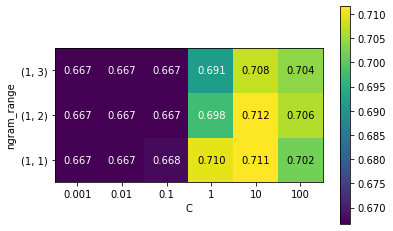

In [43]:

# извлекаем значение пр-ти, найденные в ходе решетч. поиска
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# визуализируем теплокарту
heatmap = mglearn.tools.heatmap(scores, xlabel='C', 
    ylabel='ngram_range', cmap='viridis', fmt='%.3f',
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

In [38]:
param_grid

{'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
 'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]}

In [14]:
import spacy
import nltk
import en_core_web_sm
from sklearn.feature_extraction.text import CountVectorizer

# загружаем модели пакета spacy для анлийского языка
en_nlp = en_core_web_sm.load()
# создаем экземпляр стеммера Портера из пакета nltk
stemmer = nltk.stem.PorterStemmer()

# задаем функцию, сравнивающую лемматиацию в spacy co 
# стеммингом в nltk
def compare_normalization(doc):
    # токенизируем документ в spacy
    doc_spacy = en_nlp(doc)
    # печатаем леммы, найденные с помощью spacy
    print("Лемматизация:")
    print([token.lemma_ for token in doc_spacy])
    # печатаем леммы, найденные с помощью стеммера Портера
    print('Стемминг:')
    print([stemmer.stem(token.norm_.lower()) for token in \
         doc_spacy])

In [15]:
compare_normalization(u"Our meeting today was worse than \
                      yesterday, "
"I'm scared of meeting the clients tomorrow.")

Лемматизация:
['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', '                      ', 'yesterday', ',', '-PRON-', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
Стемминг:
['our', 'meet', 'today', 'wa', 'wors', 'than', '                      ', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [16]:
# С технической точки зрения мы хотим применить токенизатор на основе
# регулярных выражений (regexp), который используется в CountVectorizer, а
# пакет spacy использовать лишь для лемматизации. Для этого мы
# заменим en_nlp.tokenizer (токенизатор пакета spacy)
# токенизатором на основе регулярных выражений.
import re

# regexp, используемые в CountVectorizer
regexp = re.compile('(?u)\\b\\w\\w+\\b')

# загружаем языковую панель spacy и сохраняем старый токенизатор
en_nlp = en_core_web_sm.load()
old_tokenizer = en_nlp.tokenizer
# заменяем токенизатор старым на основе регулярных выражений
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(
    regexp.findall(string))
# создаем пользовательский токенизатор с помощью конвейера обработки документов spacy
# (теперь используем наш собственный токенизатор)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]
# задаем countvectorizer с пользовательским токенизатором
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

In [24]:
# преобразуем text_train, используя CountVectorizer c лемматизацией
X_train_lemma = lemma_vect.fit_transform(text_train)
print("форма X_train_lemma: {}".format(X_train_lemma.shape))

# стандартный CountVectorizer для сравнения
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("форма X_train: {}".format(X_train.shape))

<ipython-input-16-666dd7355519>:15: DeprecationWarning: [W002] Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(


форма X_train_lemma: (75000, 35878)
форма X_train: (75000, 44532)


In [25]:
# строим модель решетчатого поиска, используя 1% данных
# в качестве обучающего набора
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99,
        train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv)
# выполняем решетчатый поиск, используя данные, к которым 
# применен стандартный CountVectorizer
grid.fit(X_train, y_train)
print("Наилучшее значение перекрестной проверки "
"(стандартный CountVectorizer): {:.3f}".format(
    grid.best_score_))
# выполняем решетчатый поиск, используя данные, к которым
# была применена лемматизация
grid.fit(X_train_lemma, y_train)
print("Наилучшее значение перекрестной проверки "
"(лемматизация): {:.3f}".format(grid.best_score_))

/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Наилучшее значение перекрестной проверки (стандартный CountVectorizer): 0.666


/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Наилучшее значение перекрестной проверки (лемматизация): 0.666


/home/miss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [28]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, 
                        learning_method = 'batch',
                        max_iter=25,
                        random_state=0)
# мы строим модель и преобразуем данные в один этап
# преобразование займет неекоторое время и мы сможем
# сэкономить время, выполнив обе операции сразу
document_topics = lda.fit_transform(X)
lda.components_.shape

(10, 10000)

In [29]:
# для каждой темы(строки в components_) сортируем признаки
# инвертируем строки с помощью [:, ::-1], чтобы получить
# сортировку по убыванию
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# получаем имена признаков из векторизатора
feature_names = np.array(vect.get_feature_names())
# выводим 10 тем
import mglearn

mglearn.tools.print_topics(topics=range(10), 
                           feature_names=feature_names,
                          sorting=sorting,
                          topics_per_chunk=5,
                          n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
action        worst         comedy        role          funny         
horror        nothing       john          cast          saw           
original      didn          joe           john          10            
effects       minutes       town          performance   book          
game          actually      funny         version       years         
special       actors        new           young         again         
quite         funny         plays         star          thought       
genre         re            role          play          didn          
gore          script        harry         musical       am            
pretty        want          school        played        show          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
dire

In [32]:
lda100 = LatentDirichletAllocation(n_components=100,
                               learning_method='batch',
                               max_iter=25,
                               random_state=0)
document_topics100 = lda100.fit_transform(X)
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, \
                   51, 53, 54, 63, 89, 97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, 
                            feature_names=feature_names,
                            sorting=sorting, 
                            topics_per_chunk=7, 
                            n_words=20)

KeyboardInterrupt: 

In [ ]:
сортируем документы по весу темы 45 'музыка'
music = np.argsort(document_topics100[:, 45])[::-1]
# печатаем по 5 документов, в которых данная тема 
# является наиболее важной
for i in music[:10]:
#     выводим первые два предложения
    print(b'.'.join(text_train[i].split(b'.')[:2]) + b'.\n')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
for i, words in enumerate(feature_names[sorting[:, :2]])]
# две столбиковые диаграммы:
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100,
                                       axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], 
                            ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

### Создание своей собственной модели Estimator

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class MyTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, first_parameter=1, second_parameter=2):
        # Все параметры должны быть заданы в функции __init__
        self.first_parameter = 1
        self.second_parameter = 2
    def fit(self, X, y=None):
        # fit должна принимать в качестве аргументов только X и y
        # Даже если ваша модель является неконтролируемой, вы должны принять аргумент y!
        # Подгонка модели осуществляется прямо здесь
        print("подгоняем модель прямо здесь")
        # fit возвращает self
        return self
    def transform(self, X):
        # transform принимает в качестве аргумента только X
        # Применяем преобразование к X
        X_transformed = X + 1
        return X_transformed

In [ ]:
# конец